In [ ]:
#HI RED BARON

# TAD_FINAL_PROJECT_Broker_Carl

- [1. Research Question](#1.)
- [2. Import Datasets](#2.)
  - [2.1 Setup](#2.1)
  - [2.2 Import Game Reviews via API](#2.2)
  - [2.3 Clean Game Reviews](#2.3)
  - [2.4 Save Game Reviews](#2.4)
  - [2.5 Import 'Users Per Day'](#2.5)
- [3. Analysis](#3.)
  - [3.1 Sentiment Analysis](#3.1)
    - [3.1.1 Setup](#3.1.1)
    - [3.1.2 Load Training Datasets and Pre-Process](#3.1.2)
    - [3.1.3 Pre-Process Cont. (Tokenize Data)](#3.1.3)
    - [3.1.4 Neural Network Sentiment Classification with BERT and Hugging Face](#3.1.4)
    - [3.1.5 Training (of Model)](#3.1.5)
    - [3.1.6 Sentiment Analysis of Game Reviews](#3.1.6)
  - [3.2 Sentiment Over Time](#3.2)
    - [3.2.1 Setup](#3.2.1)
    - [3.2.2 Figures](#3.2.2)
  - [3.3 Sentiment Distribution vs. Twitch Views](#3.3)
- [4. Closing Thoughts](#4.)

<a id='#1.'></a>

## 1. Research Question

        I am currently seeking employment in the field of Machine Learning, and gearing my coursework around such. 
        
        For several years, since I played Halflife as a boy, I've dreamed of working at Valve. So, as I progress through my career I submit a job applicaiton to them yearly. In 2018 a team member there responsed to my application and said I wasn't ready. So, I've maintained contact with them showcasing my progress in Graduate School. This summer, studying Natural Language Processing(NLP) gave me the enviornament I needed to scratch the surface of game reviews and what analyzing such entails. Below you will find the suggestions the Valve member gave me to explore during my summer course. I attempted, keyword 'attempted' here, to answer as many of them as I could. Please see my 4. Closing Thoughts section for description of my successes and failures.

Hi Carl,

There would seem to be a wide range of analyses to pursue:

--Can you predict review scores from review text?

--If yes, why?  If not, why not?

--Do review texts predict game sales, user counts, retention over time, etc.?

--Can you quantify user sentiment about a game? 

--Can you watch that sentiment shift over time?

--How many different sentiments can you identify?

--How many reviews contain multiple sentiments? 

I’m sure there are many more, but those are a few that seemed useful off the top of my head.

Best of luck with the project!

Mike
Steam

(Over the Summer I attempted to answer as many of these questions as I could.)

<a id='#2.'></a>

## 2. Import Datasets:

<a id='#2.1'></a>

### 2.1 Setup

In [2]:
# import packages
import os
import sys
import time
import json
import numpy as np
import pandas as pd
import urllib.parse
import urllib.request
from tqdm import tqdm
import plotly.express as px
from datetime import datetime
from pandas import json_normalize
from tqdm import tqdm

# list package ver. etc.
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)
print('---------------')

Python version
3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]
Version info.
sys.version_info(major=3, minor=8, micro=12, releaselevel='final', serial=0)
---------------


<a id='#2.2'></a>

## 2.2 Import Game Reviews via API
##### (API Documentation: https://partner.steamgames.com/doc/store/getreviews)

In [2]:
# generate game review df

#steam 'chunks' their json files (the game reviews) in sets of 100
#ending with a signature, a 'cursor'. This cursor is then pasted
#onto the the same url, to 'grab' the next chunk and so on. 
#This sequence block with an 'end cursor' of 'AoJ4tey90tECcbOXSw=='

#set variables
url_base = 'https://store.steampowered.com/appreviews/393380?json=1&filter=updated&language=all&review_type=all&purchase_type=all&num_per_page=100&cursor='

#first pass
url = urllib.request.urlopen("https://store.steampowered.com/appreviews/393380?json=1&filter=updated&language=all&review_type=all&purchase_type=all&num_per_page=100&cursor=*")
data = json.loads(url.read().decode())
next_cursor = data['cursor']
next_cursor = next_cursor.replace('+', '%2B')
df1 = json_normalize(data['reviews'])
print(next_cursor)

#add results till stopcursor met, then send all results to csv

while True:
    time.sleep(0.5) # Sleep for half-second
    url_temp = url_base + next_cursor
    url = urllib.request.urlopen(url_temp)
    data = json.loads(url.read().decode())
    next_cursor = data['cursor']
    next_cursor = next_cursor.replace('+', '%2B')
    df2 = json_normalize(data['reviews'])
    df1 = pd.concat([df1, df2])
    print(next_cursor)
    if next_cursor == 'AoJwnPKp0tECeIWXSw==' or next_cursor == '*':
        df_steam_reviews = df1
        df1 = None
        break
        
#the hash below is each 'cursor' I loop through until the 'end cursor'.
#this is just my way of monitoring the download.

AoJ4h4iR/PwCfv/yrgE=
AoJ4z/7E9/wCcJKGhgM=
AoJwj43r8vwCeYTUhQM=
AoJ42ca57vwCecGCfw==
AoJwxsuE6/wCe772hAM=
AoJw3NP95vwCfpq/hAM=
AoJwxdqo4vwCf9aLhAM=
AoJ496T03fwCc8XjgwM=
AoJwwr6m2PwCddCogwM=
AoJ49NKD1PwCeL35ggM=
AoJ4nsuQz/wCdPbNggM=
AoJw/LzsyPwCf8KWggM=
AoJw1NKGxPwCcuvigQM=
AoJw88S4vfwCfIamgQM=
AoJ4%2BIWPuPwCeYmdoQI=
AoJ4gcDgsvwCff27gAM=
AoJ4i5rArvwCdq%2BRgAM=
AoJwxMXuqPwCfsPT/wI=
AoJw0dS5pfwCdv2s/wI=
AoJ44LbwofwCf/yLsgI=
AoJwiLb0nPwCd5bC/gI=
AoJ4t9uimPwCfoyC/gI=
AoJw98Csk/wCfsDM/QI=
AoJ41IS7j/wCet%2Bo/QI=
AoJ4jtiXi/wCc9P8/AI=
AoJ49MufhvwCcaTO/AI=
AoJ4iYXtgfwCdbii/AI=
AoJ4g9m0/fsCf6fx%2BwI=
AoJ4kpGD%2BfsCdcK/%2BwI=
AoJwpZax9PsCc6aP%2BwI=
AoJwxrCK7/sCfJjb%2BgI=
AoJwzPTS6/sCcc%2Bz%2BgI=
AoJ44tak6PsCeY6K%2BgI=
AoJwh/bx4/sCe7/f%2BQI=
AoJw//PK3vsCdrSm%2BQI=
AoJwxYzj2vsCfYH9%2BAI=
AoJw2/uN1/sCdOrV%2BAI=
AoJ40cu00vsCev2n%2BAI=
AoJ4z9iuzvsCcMmA%2BAI=
AoJ4qpiLy/sCdrrU6wE=
AoJ487Kix/sCdsOx9wI=
AoJ4nqP0w/sCd6iJ9wI=
AoJ435yJwPsCdqXu4QI=
AoJ4n7L5u/sCepDZdg==
AoJ4gbCJuPsCcvH8eg==
AoJ49rHbtPsCcMOirAI=


In [3]:
# inspect columns
print(df_steam_reviews.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90971 entries, 0 to 71
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   recommendationid                90971 non-null  object 
 1   language                        90971 non-null  object 
 2   review                          90971 non-null  object 
 3   timestamp_created               90971 non-null  int64  
 4   timestamp_updated               90971 non-null  int64  
 5   voted_up                        90971 non-null  bool   
 6   votes_up                        90971 non-null  int64  
 7   votes_funny                     90971 non-null  int64  
 8   weighted_vote_score             90971 non-null  object 
 9   comment_count                   90971 non-null  int64  
 10  steam_purchase                  90971 non-null  bool   
 11  received_for_free               90971 non-null  bool   
 12  written_during_early_access     909

In [4]:
# inspect shape
print(df_steam_reviews.shape)

(90971, 22)


---
### Data Dictionary:

- Response:
    - success - 1 if the query was successful
    - query_summary - Returned in the first request
        - recommendationid - The unique id of the recommendation
        - author
            - steamid - the user’s SteamID
            - um_games_owned - number of games owned by the user
            - num_reviews - number of reviews written by the user
            - playtime_forever - lifetime playtime tracked in this app
            - playtime_last_two_weeks - playtime tracked in the past two weeks for this app
            - playtime_at_review - playtime when the review was written
            - last_played - time for when the user last played
        - language - language the user indicated when authoring the review
        - review - text of written review
        - timestamp_created - date the review was created (unix timestamp)
        - timestamp_updated - date the review was last updated (unix timestamp)
        - voted_up - true means it was a positive recommendation
        - votes_up - the number of users that found this review helpful
        - votes_funny - the number of users that found this review funny
        - weighted_vote_score - helpfulness score
        - comment_count - number of comments posted on this review
        - steam_purchase - true if the user purchased the game on Steam
        - received_for_free - true if the user checked a box saying they got the app for free
        - written_during_early_access - true if the user posted this review while the game was in Early Access
        - developer_response - text of the developer response, if any
        - timestamp_dev_responded - Unix timestamp of when the developer responded, if applicable

---
Source: https://partner.steamgames.com/doc/store/getreviews

In [5]:
# inspect df
df_steam_reviews

,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,...,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,timestamp_dev_responded,developer_response
0,102460437,english,very realistic,1636418051,1636418051,True,0,0,0,0,...,False,76561198978326778,11,1,930,930,911.0,1636419328,NaN,NaN
1,102460168,english,great community only plays 6 hours yet had som...,1636417501,1636417501,True,0,0,0,0,...,False,76561198303556161,68,3,464,464,446.0,1636422094,NaN,NaN
2,102460116,english,if you want a Mil-sim game where people are al...,1636417371,1636417371,True,0,0,0,0,...,False,76561198160748485,17,1,1022,16,1015.0,1636422604,NaN,NaN
3,102458821,german,Bester Metallbaum Simulator auf dem markt,1636414755,1636414755,True,0,0,0,0,...,False,76561198838348149,32,2,35050,2243,35050.0,1636414625,NaN,NaN
4,102456954,english,Great game!,1636411096,1636411096,True,0,0,0,0,...,False,76561198027676924,144,2,18416,339,18356.0,1636423338,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,19708021,english,You're seriously looking for reviews for this ...,1450166600,1450166600,True,4,1,0.5,0,...,True,76561198038106526,249,5,98808,0,3561.0,1625961332,NaN,NaN
68,19708019,english,I get to rub butts as a medic\n\n10/10,1450166594,1450166594,True,88,285,0.559034168720245361,1,...,True,76561198008197373,399,2,5393,0,1837.0,1606539289,NaN,NaN
69,19708009,english,Communication and teamplay is one of the best ...,1450166529,1450166529,True,44,3,0.566997230052947998,0,...,True,76561198014615390,271,2,13850,0,2788.0,1602734063,NaN,NaN
70,19708002,english,If you're looking for a realistic mil-sim styl...,1450166484,1450166484,True,38,2,0.637014091014862061,0,...,True,76561198066675517,556,9,4636,0,1900.0,1603076360,NaN,NaN


<a id='#2.3'></a>

## 2.3 Clean Game Reviews

In [6]:
#drop empty cols 'timestamp_dev_responded' and 'developer_response'
df_steam_reviews = df_steam_reviews.drop(['timestamp_dev_responded', 'developer_response'], axis=1)

# convert unix timestamp columns to datetime format
def time_to_clean(x):
    return datetime.fromtimestamp(x)

df_steam_reviews['timestamp_created'] = df_steam_reviews['timestamp_created'].apply(time_to_clean)
df_steam_reviews['timestamp_updated'] = df_steam_reviews['timestamp_updated'].apply(time_to_clean)
df_steam_reviews['author.last_played'] = df_steam_reviews['author.last_played'].apply(time_to_clean)

# inspect
df_steam_reviews

,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,102460437,english,very realistic,2021-11-08 18:34:11,2021-11-08 18:34:11,True,0,0,0,0,True,False,False,76561198978326778,11,1,930,930,911.0,2021-11-08 18:55:28
1,102460168,english,great community only plays 6 hours yet had som...,2021-11-08 18:25:01,2021-11-08 18:25:01,True,0,0,0,0,True,False,False,76561198303556161,68,3,464,464,446.0,2021-11-08 19:41:34
2,102460116,english,if you want a Mil-sim game where people are al...,2021-11-08 18:22:51,2021-11-08 18:22:51,True,0,0,0,0,True,False,False,76561198160748485,17,1,1022,16,1015.0,2021-11-08 19:50:04
3,102458821,german,Bester Metallbaum Simulator auf dem markt,2021-11-08 17:39:15,2021-11-08 17:39:15,True,0,0,0,0,True,False,False,76561198838348149,32,2,35050,2243,35050.0,2021-11-08 17:37:05
4,102456954,english,Great game!,2021-11-08 16:38:16,2021-11-08 16:38:16,True,0,0,0,0,True,False,False,76561198027676924,144,2,18416,339,18356.0,2021-11-08 20:02:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,19708021,english,You're seriously looking for reviews for this ...,2015-12-15 02:03:20,2015-12-15 02:03:20,True,4,1,0.5,0,False,False,True,76561198038106526,249,5,98808,0,3561.0,2021-07-10 18:55:32
68,19708019,english,I get to rub butts as a medic\n\n10/10,2015-12-15 02:03:14,2015-12-15 02:03:14,True,88,285,0.559034168720245361,1,False,False,True,76561198008197373,399,2,5393,0,1837.0,2020-11-27 22:54:49
69,19708009,english,Communication and teamplay is one of the best ...,2015-12-15 02:02:09,2015-12-15 02:02:09,True,44,3,0.566997230052947998,0,False,False,True,76561198014615390,271,2,13850,0,2788.0,2020-10-14 22:54:23
70,19708002,english,If you're looking for a realistic mil-sim styl...,2015-12-15 02:01:24,2015-12-15 02:01:24,True,38,2,0.637014091014862061,0,False,False,True,76561198066675517,556,9,4636,0,1900.0,2020-10-18 21:59:20


<a id='#2.4'></a>

## 2.4 Save Game Reviews

In [7]:
# save that sheet
df_steam_reviews.to_csv(r'../data/processed/game_reviews_processed.csv', index=False)

In [4]:
#load that sheet, if restarted instance
# save that sheet
df_steam_reviews = pd.read_csv(r'../data/processed/game_reviews_processed.csv')

<a id='#2.5'></a>

## 2.5 Import 'Users Per Day'

In [5]:
#load 'steam charts for every day' downloaded by hand from https://steamdb.info/ on August 14th 
df_upd = pd.read_csv(r'../data/processed/users_per_day.csv')

In [6]:
#convert 'DateTime' col to datetime Dtype.
df_upd['DateTime'] = pd.to_datetime(df_upd['DateTime'])

In [7]:
#inspect cols
print(df_upd.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateTime        1748 non-null   datetime64[ns]
 1   Players         1731 non-null   float64       
 2   Flags           0 non-null      float64       
 3   Twitch Viewers  1088 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 54.8 KB
None


In [8]:
#inspect shape
df_upd.shape

(1748, 4)

In [9]:
#inspect df
df_upd

,DateTime,Players,Flags,Twitch Viewers
0,2015-11-01,5.0,NaN,NaN
1,2015-11-02,NaN,NaN,NaN
2,2015-11-03,NaN,NaN,NaN
3,2015-11-04,NaN,NaN,NaN
4,2015-11-05,NaN,NaN,NaN
...,...,...,...,...
1743,2020-08-09,6141.0,NaN,254.0
1744,2020-08-10,5210.0,NaN,890.0
1745,2020-08-11,5083.0,NaN,370.0
1746,2020-08-12,4987.0,NaN,654.0


<a id='#3.'></a>

# 3. Analysis: 

<a id='#3.1'></a>

## 3.1 Sentiment Analysis
--Can you quantify user sentiment about a game? 

<a id='#3.1.1'></a>

## 3.1.1 Setup

In [3]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

import os as os
import sys as sys
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rc
from pylab import rcParams
from torch import nn, optim
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import json
import pandas as pd
import urllib.parse
import urllib.request
from time import sleep
from pandas import json_normalize

#set graph config
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

#set seed
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

#check gpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

<a id='#3.1.2'></a>

## 3.1.2 Load Training Datasets and Pre-Process

In [11]:
#load training dataset (google app reviews, 16K rows)
df_google = pd.read_csv(r'../data/processed/reviews.csv')

In [12]:
#inspect google reviews
df_google.head(0)

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId


In [13]:
#inspect #2
df_google.shape

(15746, 11)

In [14]:
#The imbalce is ok, because we're dividing between negative(1,2) neutral(3) and positive (4,5).
def to_sentiment(rating):
  rating = int(rating)
  if rating <= 2:
    return 0
  elif rating == 3:
    return 1
  else: 
    return 2

#apply above function to dataset
df_google['sentiment'] = df_google.score.apply(to_sentiment)

C:\Users\carlb\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\carlb\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


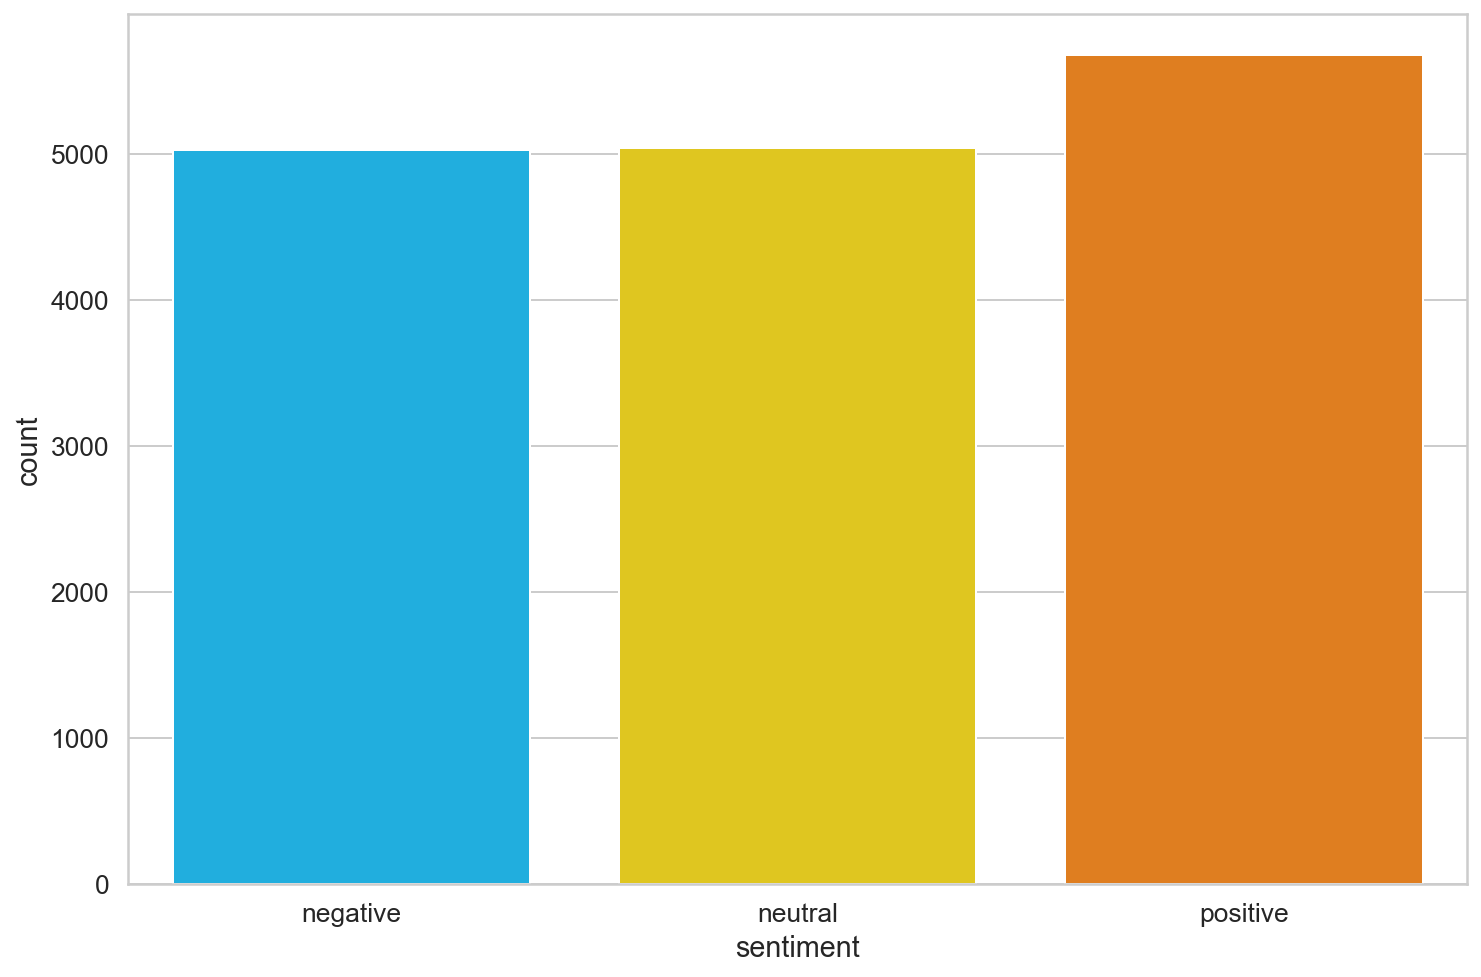

In [15]:
#review changes
class_names = ['negative', 'neutral', 'positive']
ax = sns.countplot(df_google.sentiment)
plt.xlabel('review sentiment')
sns.countplot(df_google.sentiment)
ax.set_xticklabels(class_names);

In [16]:
#subset google for relavent info
df_google_subset = df_google[['content', 'sentiment']]

#rename for gpu loading
frames = [df_google_subset] #I omitted df_imdb, due to limited gpu memory
df = pd.concat(frames)
df

,content,sentiment
0,Update: After getting a response from the deve...,0
1,Used it for a fair amount of time without any ...,0
2,Your app sucks now!!!!! Used to be good but no...,0
3,"It seems OK, but very basic. Recurring tasks n...",0
4,Absolutely worthless. This app runs a prohibit...,0
...,...,...
15741,I believe that this is by far the best app wit...,2
15742,It sometimes crashes a lot!!,2
15743,Works well for what I need,2
15744,Love it.,2


<a id='#3.1.3'></a>

## 3.1.3 Pre-Process Cont. (Tokenize Data)

1) Add special tokens to separate sentences and do classification

2) Pass sequences of constant length (introduce padding)

3) Create array of 0s (pad token) and 1s (real token) called 'attention mask'

In [17]:
#there are two model types to choose from, case and uncased. 
#We're using 'cased', as "BAD" might convey more sentiment than "bad".

#identify model
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'

In [18]:
#load pre-trained BertTokenizer
#https://huggingface.co/transformers/model_doc/bert.html#berttokenizer

tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

#if you get an error, execute 'conda install -c conda-forge ipywidgets' in your env:
#https://ipywidgets.readthedocs.io/en/stable/user_install.html

100%|██████████| 15746/15746 [00:10<00:00, 1527.02it/s]
C:\Users\carlb\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


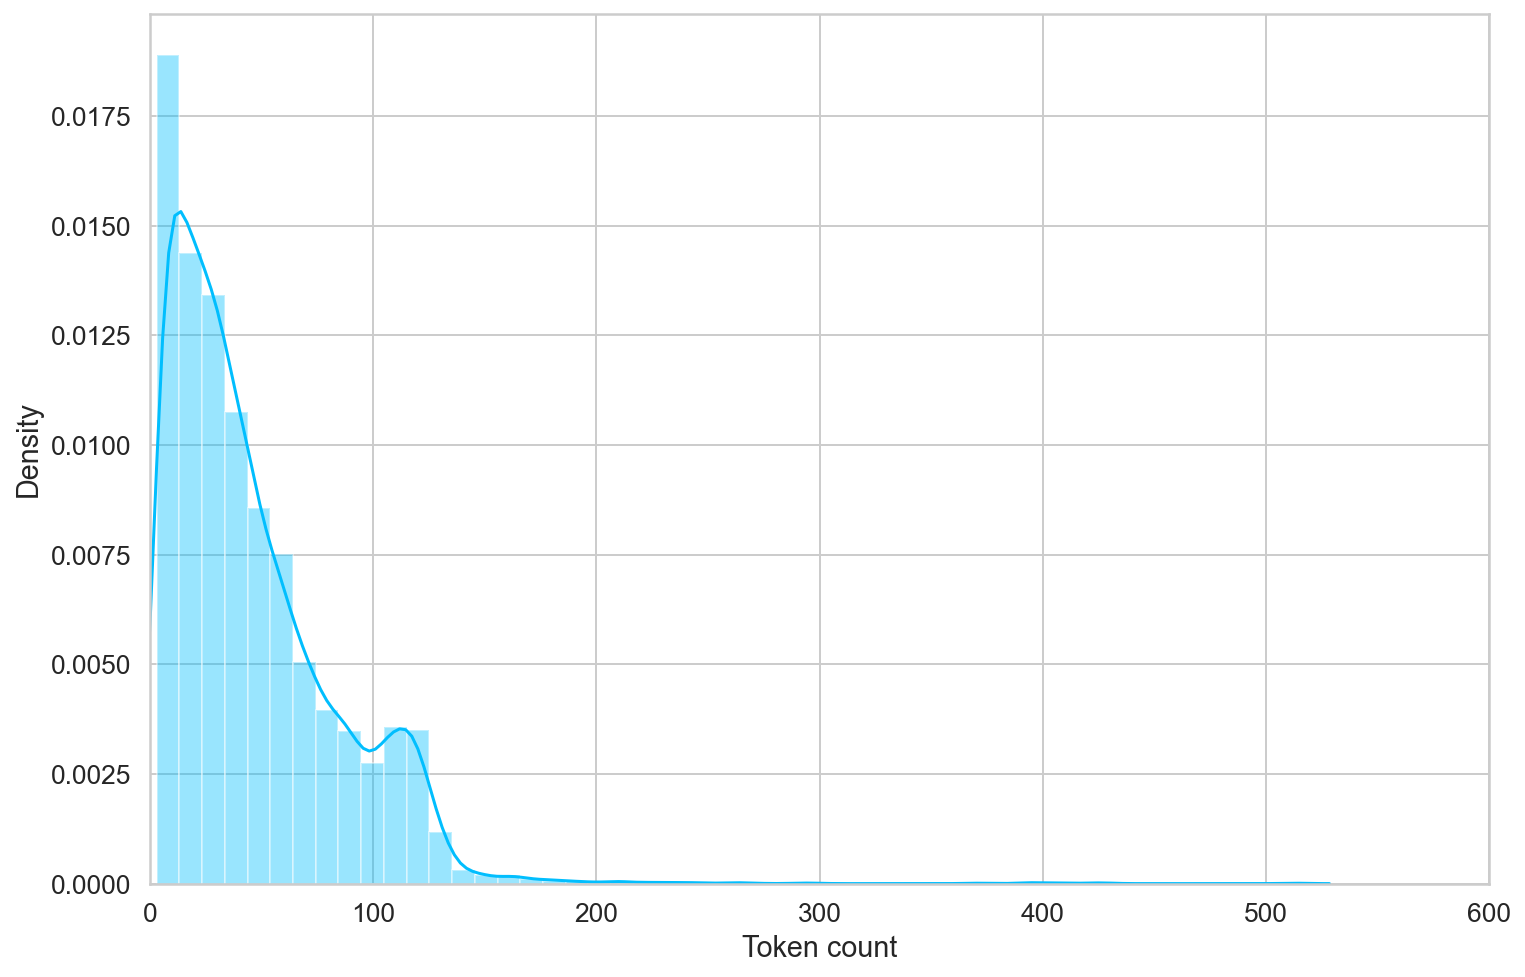

In [19]:
#BERT works with fixed-length sequences. Let's inspect the length of each review from our training dataset and tokenize it
token_lens = []

for txt in tqdm(df.content):
  tokens = tokenizer.encode(txt, max_length=512) #max len of this model is 512, sadly
  token_lens.append(len(tokens))
    
#let's plot the distribution to get a sense of what we're working with
sns.distplot(token_lens)
plt.xlim([0, 600]);
plt.xlabel('Token count');

In [20]:
#as a result of trial and error, due to gpu memeory limitations, we need to set a max len of our tensors to 150.
MAX_LEN = 512

In [21]:
#let's format our dataset to PyTorch dataset.
class GPReviewDataset(Dataset):

  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.reviews)
  
  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [22]:
#test-train-split training data
df_train, df_test = train_test_split(df, test_size=0.1, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

In [23]:
#inspect shape
df_train.shape, df_val.shape, df_test.shape

((14171, 2), (787, 2), (788, 2))

In [24]:
#data loader, that's required in the tutorial. I see that it's converting things to numpy arrays, 
#but aside from that, that's all I understand (sadly)
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    reviews=df.content.to_numpy(),
    targets=df.sentiment.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=0 #when running pytorch in windows, not linux, you need to set this to zero or it crashes.  
  )               #https://github.com/pytorch/pytorch/issues/2341

In [25]:
#set batch size and loader values
BATCH_SIZE = 8

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [26]:
#let's look at an example batch from out trining data loader:
data = next(iter(train_data_loader))
data.keys()

C:\Users\carlb\anaconda3\envs\pytorch_gpu\lib\site-packages\transformers\tokenization_utils_base.py:2212: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [27]:
#inspect shape
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([8, 512])
torch.Size([8, 512])
torch.Size([8])


<a id='#3.1.4'></a>

## 3.1.4 Neural Netowrk Sentiment Classification with BERT and Hugging Face

In [28]:
# load model:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [29]:
#we use this knowledge to make a classifier that uses the BERT mdoel:
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME, return_dict=False)
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    output = self.drop(pooled_output)
    return self.out(output)

In [30]:
#let's make an instace if the the above class and move it to our GPU
model = SentimentClassifier(len(class_names))
model = model.to(device)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<a id='#3.1.5'></a>

## 3.1.5 Training (of Model)

In [31]:
EPOCHS = 20

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [32]:
#set training function 
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for d in tqdm(data_loader):
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [33]:
# set eval funciton
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in tqdm(data_loader):
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [34]:
#clear gpu cache before training
torch.cuda.empty_cache()

In [35]:
# execute training
history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/20
----------


100%|██████████| 1772/1772 [05:42<00:00,  5.17it/s]


Train loss 0.8242155769608629 accuracy 0.6092018911862254


100%|██████████| 99/99 [00:05<00:00, 16.64it/s]


Val   loss 0.667631811942115 accuracy 0.7153748411689962

Epoch 2/20
----------


100%|██████████| 1772/1772 [05:27<00:00,  5.40it/s]


Train loss 0.5140784255956335 accuracy 0.8027662126878837


100%|██████████| 99/99 [00:05<00:00, 16.64it/s]


Val   loss 0.6682911393129163 accuracy 0.8030495552731893

Epoch 3/20
----------


100%|██████████| 1772/1772 [05:29<00:00,  5.38it/s]


Train loss 0.3507544150975828 accuracy 0.895631924352551


100%|██████████| 99/99 [00:05<00:00, 16.69it/s]


Val   loss 0.7330258448521202 accuracy 0.8487928843710293

Epoch 4/20
----------


100%|██████████| 1772/1772 [05:37<00:00,  5.25it/s]


Train loss 0.2539400196970997 accuracy 0.936137181567991


100%|██████████| 99/99 [00:05<00:00, 16.79it/s]


Val   loss 0.7489133595008017 accuracy 0.852604828462516

Epoch 5/20
----------


100%|██████████| 1772/1772 [05:29<00:00,  5.37it/s]


Train loss 0.18706166027161097 accuracy 0.9548373438712865


100%|██████████| 99/99 [00:06<00:00, 16.21it/s]


Val   loss 0.8391378211525429 accuracy 0.8538754764930114

Epoch 6/20
----------


100%|██████████| 1772/1772 [05:34<00:00,  5.29it/s]


Train loss 0.1453176136011253 accuracy 0.9645049749488392


100%|██████████| 99/99 [00:05<00:00, 17.02it/s]


Val   loss 0.9157683184809013 accuracy 0.855146124523507

Epoch 7/20
----------


100%|██████████| 1772/1772 [05:35<00:00,  5.29it/s]


Train loss 0.12292518904002256 accuracy 0.9695857737633194


100%|██████████| 99/99 [00:05<00:00, 16.56it/s]


Val   loss 0.8966503629520902 accuracy 0.866581956797967

Epoch 8/20
----------


100%|██████████| 1772/1772 [05:29<00:00,  5.37it/s]


Train loss 0.09841775479240827 accuracy 0.975372239079811


100%|██████████| 99/99 [00:06<00:00, 16.48it/s]


Val   loss 0.8958577276793258 accuracy 0.8742058449809403

Epoch 9/20
----------


100%|██████████| 1772/1772 [05:32<00:00,  5.32it/s]


Train loss 0.08053081994302853 accuracy 0.9793945381412744


100%|██████████| 99/99 [00:06<00:00, 16.03it/s]


Val   loss 1.0342973752468065 accuracy 0.866581956797967

Epoch 10/20
----------


100%|██████████| 1772/1772 [05:30<00:00,  5.35it/s]


Train loss 0.06926842110258365 accuracy 0.9808058711452968


100%|██████████| 99/99 [00:05<00:00, 16.84it/s]


Val   loss 1.1871728304748361 accuracy 0.8589580686149937

Epoch 11/20
----------


100%|██████████| 1772/1772 [05:31<00:00,  5.35it/s]


Train loss 0.059841105636082144 accuracy 0.9834874038529391


100%|██████████| 99/99 [00:05<00:00, 16.86it/s]


Val   loss 1.0634233488902585 accuracy 0.8703939008894537

Epoch 12/20
----------


100%|██████████| 1772/1772 [05:22<00:00,  5.49it/s]


Train loss 0.048451696398090174 accuracy 0.9857455366593748


100%|██████████| 99/99 [00:05<00:00, 17.14it/s]


Val   loss 1.162652748032023 accuracy 0.8640406607369759

Epoch 13/20
----------


100%|██████████| 1772/1772 [05:34<00:00,  5.30it/s]


Train loss 0.0486607078839255 accuracy 0.9856044033589726


100%|██████████| 99/99 [00:06<00:00, 16.49it/s]


Val   loss 1.1542575760032203 accuracy 0.8691232528589581

Epoch 14/20
----------


100%|██████████| 1772/1772 [05:29<00:00,  5.37it/s]


Train loss 0.04309761248950029 accuracy 0.9868746030625927


100%|██████████| 99/99 [00:05<00:00, 16.90it/s]


Val   loss 1.1915194548978756 accuracy 0.866581956797967

Epoch 15/20
----------


100%|██████████| 1772/1772 [05:25<00:00,  5.45it/s]


Train loss 0.03962534632600722 accuracy 0.9880036694658105


100%|██████████| 99/99 [00:05<00:00, 16.92it/s]


Val   loss 1.2524602688905324 accuracy 0.8602287166454893

Epoch 16/20
----------


100%|██████████| 1772/1772 [05:23<00:00,  5.48it/s]


Train loss 0.03625904141141706 accuracy 0.9881448027662127


100%|██████████| 99/99 [00:05<00:00, 16.93it/s]


Val   loss 1.2355227740596055 accuracy 0.8691232528589581

Epoch 17/20
----------


100%|██████████| 1772/1772 [05:26<00:00,  5.43it/s]


Train loss 0.03195476417708262 accuracy 0.988921035918425


100%|██████████| 99/99 [00:06<00:00, 16.31it/s]


Val   loss 1.2294410370101343 accuracy 0.8703939008894537

Epoch 18/20
----------


100%|██████████| 1772/1772 [05:25<00:00,  5.44it/s]


Train loss 0.03164068044349443 accuracy 0.9892738691694306


100%|██████████| 99/99 [00:05<00:00, 16.97it/s]


Val   loss 1.2815960625385199 accuracy 0.8640406607369759

Epoch 19/20
----------


100%|██████████| 1772/1772 [05:20<00:00,  5.52it/s]


Train loss 0.03006927867577812 accuracy 0.9894150024698328


100%|██████████| 99/99 [00:05<00:00, 16.93it/s]


Val   loss 1.2874247880345504 accuracy 0.8653113087674714

Epoch 20/20
----------


100%|██████████| 1772/1772 [05:23<00:00,  5.48it/s]


Train loss 0.02713451804616189 accuracy 0.9899795356714417


100%|██████████| 99/99 [00:05<00:00, 16.89it/s]

Val   loss 1.2671616919548034 accuracy 0.8678526048284626



In [54]:
#gather training results
df_history = pd.DataFrame.from_dict(history, orient='index')
df_history_t = df_history.transpose()
df_history_t.head()

,train_acc,train_loss,val_acc,val_loss
0,"tensor(0.6092, device='cuda:0', dtype=torch.fl...",0.824216,"tensor(0.7154, device='cuda:0', dtype=torch.fl...",0.667632
1,"tensor(0.8028, device='cuda:0', dtype=torch.fl...",0.514078,"tensor(0.8030, device='cuda:0', dtype=torch.fl...",0.668291
2,"tensor(0.8956, device='cuda:0', dtype=torch.fl...",0.350754,"tensor(0.8488, device='cuda:0', dtype=torch.fl...",0.733026
3,"tensor(0.9361, device='cuda:0', dtype=torch.fl...",0.25394,"tensor(0.8526, device='cuda:0', dtype=torch.fl...",0.748913
4,"tensor(0.9548, device='cuda:0', dtype=torch.fl...",0.187062,"tensor(0.8539, device='cuda:0', dtype=torch.fl...",0.839138


In [76]:
#make figure data
train_acc_lst = df_history_t['train_acc'].tolist()
val_acc_lst = df_history_t['val_acc'].tolist()

#annoying stuff
temp_train = []
for item in range(0,20):
    acc = train_acc_lst[item].item()
    temp_train.append(acc)
train_acc = temp_train
temp_train = None

temp_val = []
for item in range(0,20):
    acc = val_acc_lst[item].item()
    temp_val.append(acc)
val_acc = temp_val
temp_val = None



(0.0, 1.0)

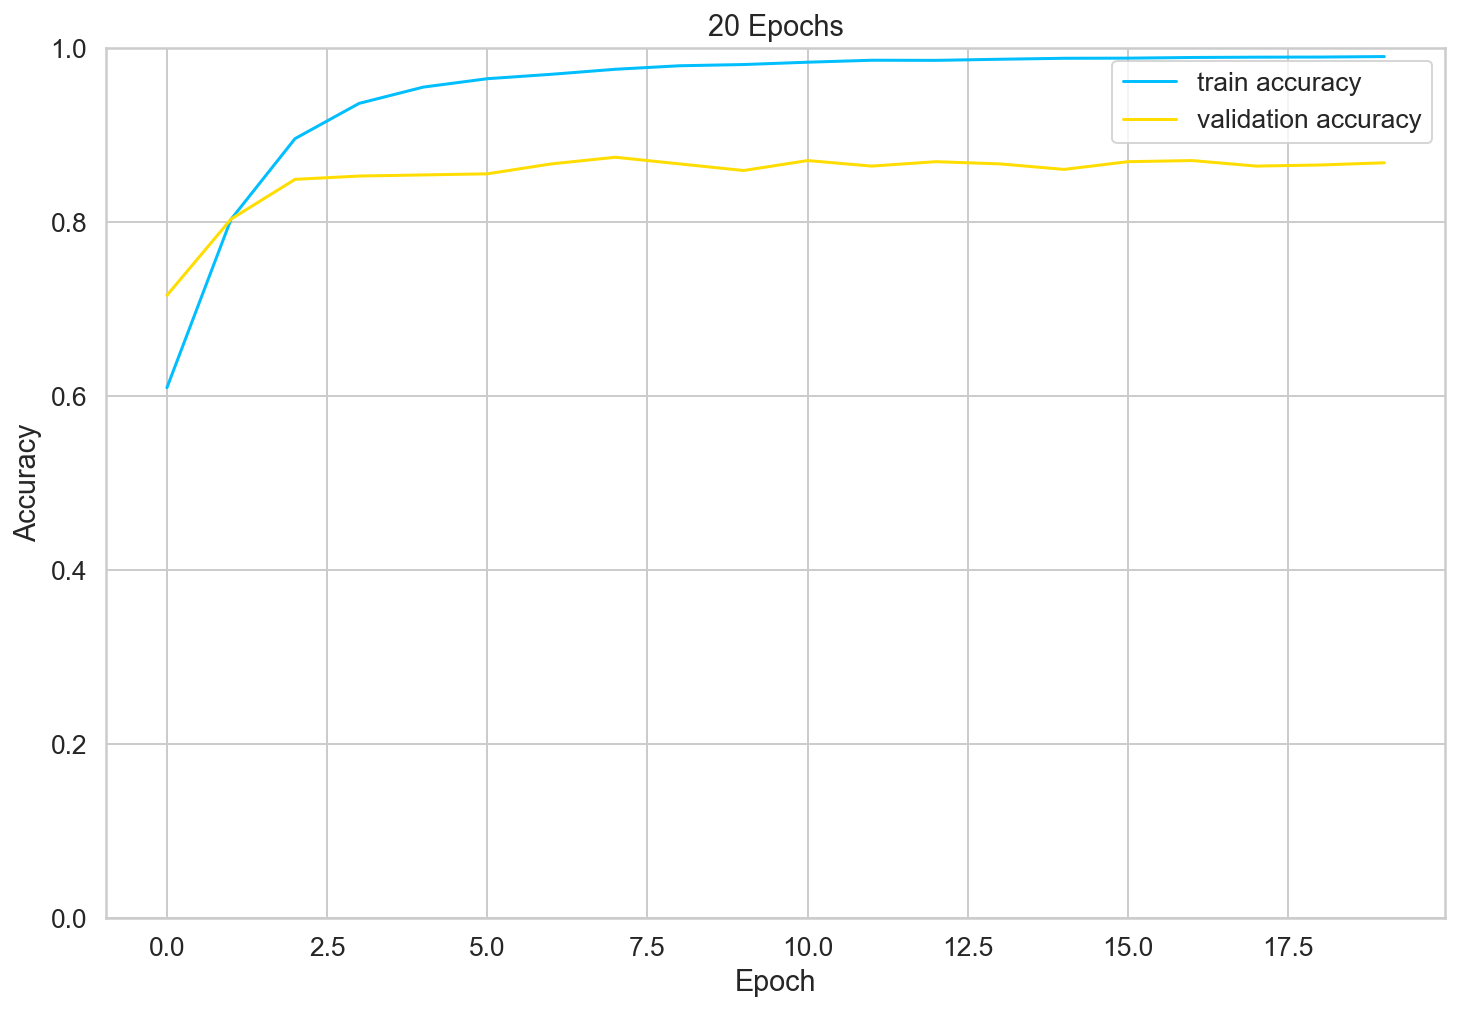

In [77]:
#display figuer
plt.plot(train_acc, label='train accuracy')
plt.plot(val_acc, label='validation accuracy')

plt.title('20 Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1])

<a id='#3.1.6'></a>

## 3.1.6 Sentiment Analysis of Game Reviews

In [78]:
# load raw text
df_game_reviews = pd.read_csv(r'../data/processed/game_reviews_processed.csv', low_memory=False)

In [79]:
# subset df to just english reviews
df_english = df_game_reviews[df_game_reviews["language"] == 'english']

In [80]:
# set reviews to list
title_lst = df_english['review'].tolist()

In [81]:
title_lst_final = []

for item in title_lst:
    temp = str(item)
    title_lst_final.append(temp)

In [83]:
# pass each review through sentiment model
review_text_lst = []
prediction_lst = []

for item in tqdm(title_lst_final):
    encoded_review = tokenizer.encode_plus(item, max_length=MAX_LEN, 
                                           add_special_tokens=True, 
                                           return_token_type_ids=False, 
                                           pad_to_max_length=True, 
                                           return_attention_mask=True, 
                                           return_tensors='pt',)
    
    input_ids = encoded_review['input_ids'].to(device)
    attention_mask = encoded_review['attention_mask'].to(device)
    output = model(input_ids, attention_mask)
    _, prediction = torch.max(output, dim=1)
    
    review_text_lst.append(item)
    prediction_lst.append(class_names[prediction])

100%|██████████| 56441/56441 [11:23<00:00, 82.55it/s]


In [84]:
#count up your glorious sentiment results
pos_count = 0
neg_count = 0
neu_count = 0

for item in prediction_lst:
    if item == 'positive':
        pos_count += 1
    elif item == 'neutral':
        neu_count += 1
    else:
        neg_count += 1

In [85]:
print('Positive reviews: ', pos_count)
print('Negative reviews: ', neg_count)
print('Neutral reviews: ', neu_count)

Positive reviews:  31498
Negative reviews:  10322
Neutral reviews:  14621


<a id='#3.2'></a>

<a id='#3.1.7'></a>

## 3.2 Sentiment Over Time
--Can you watch that sentiment shift over time?

<a id='#3.2.1'></a>

## 3.2.1 Setup

In [86]:
# join reviews, predictions, timestamps, views-per-day into one df
df_analysis = pd.DataFrame(df_english)

# add predictions to df_analysis
df_analysis['predictions'] = prediction_lst

In [87]:
#add blank sentiment counts to views per day dataframe
df_upd['pos_sent_count'] = np.nan
df_upd['neg_sent_count'] = np.nan
df_upd['neu_sent_count'] = np.nan

In [88]:
#save dfs to csvs
df_upd.to_csv(r'../data/processed/df_upd.csv', index=False)
df_analysis.to_csv(r'../data/processed/df_analysis.csv', index=False)

In [26]:
#edit df_upd in Excel, yep. excel. deal with it. 

#reload df
df_upd = pd.read_csv(r'../data/processed/df_upd_edited.csv', low_memory=False)

#reformat datetime column to python DateTime
df_upd['DateTime'] = pd.to_datetime(df_upd['DateTime'])
#regormat pos_dist to int64
#df_upd["pos_dist"] = pd.to_numeric(df_upd["pos_dist"])
df_upd.head()

,DateTime,Players,neg_sent_count,neu_sent_count,pos_sent_count,Twitch_Viewers,pos_dist
0,2015-11-01,5,0,0,0,0,0
1,2015-11-02,0,0,0,0,0,0
2,2015-11-03,0,0,0,0,0,0
3,2015-11-04,0,0,0,0,0,0
4,2015-11-05,0,0,0,0,0,0


In [27]:
#make list of dates, pos_dist, pos_count, neg_count and neu_count
scatter_dates = df_upd['DateTime'].tolist()
scatter_postdist = df_upd['pos_dist'].tolist()
scatter_pos_count = df_upd['pos_sent_count'].tolist()
scatter_neg_count = df_upd['neg_sent_count'].tolist()
scatter_neu_count = df_upd['neu_sent_count'].tolist()

<a id='#3.2.2'></a>

## 3.2.2 Figures

Text(0.5, 0, 'Date')

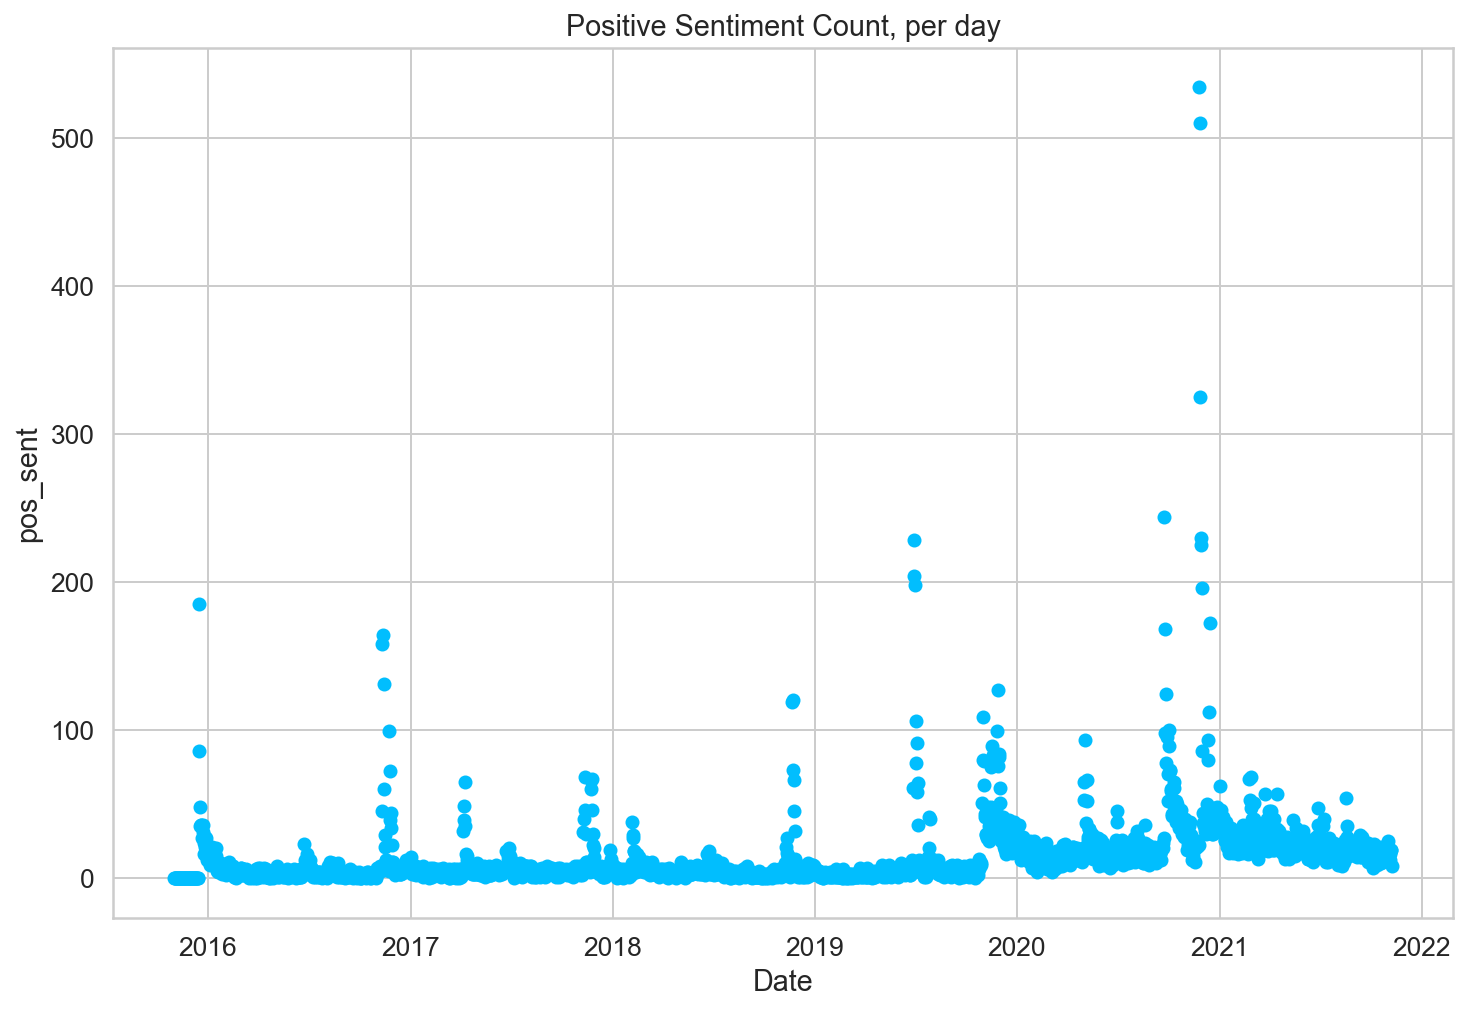

In [28]:
#inspect pos counts
plt.scatter(scatter_dates, scatter_pos_count)
plt.title('Positive Sentiment Count, per day')
plt.ylabel('pos_sent')
plt.xlabel('Date')

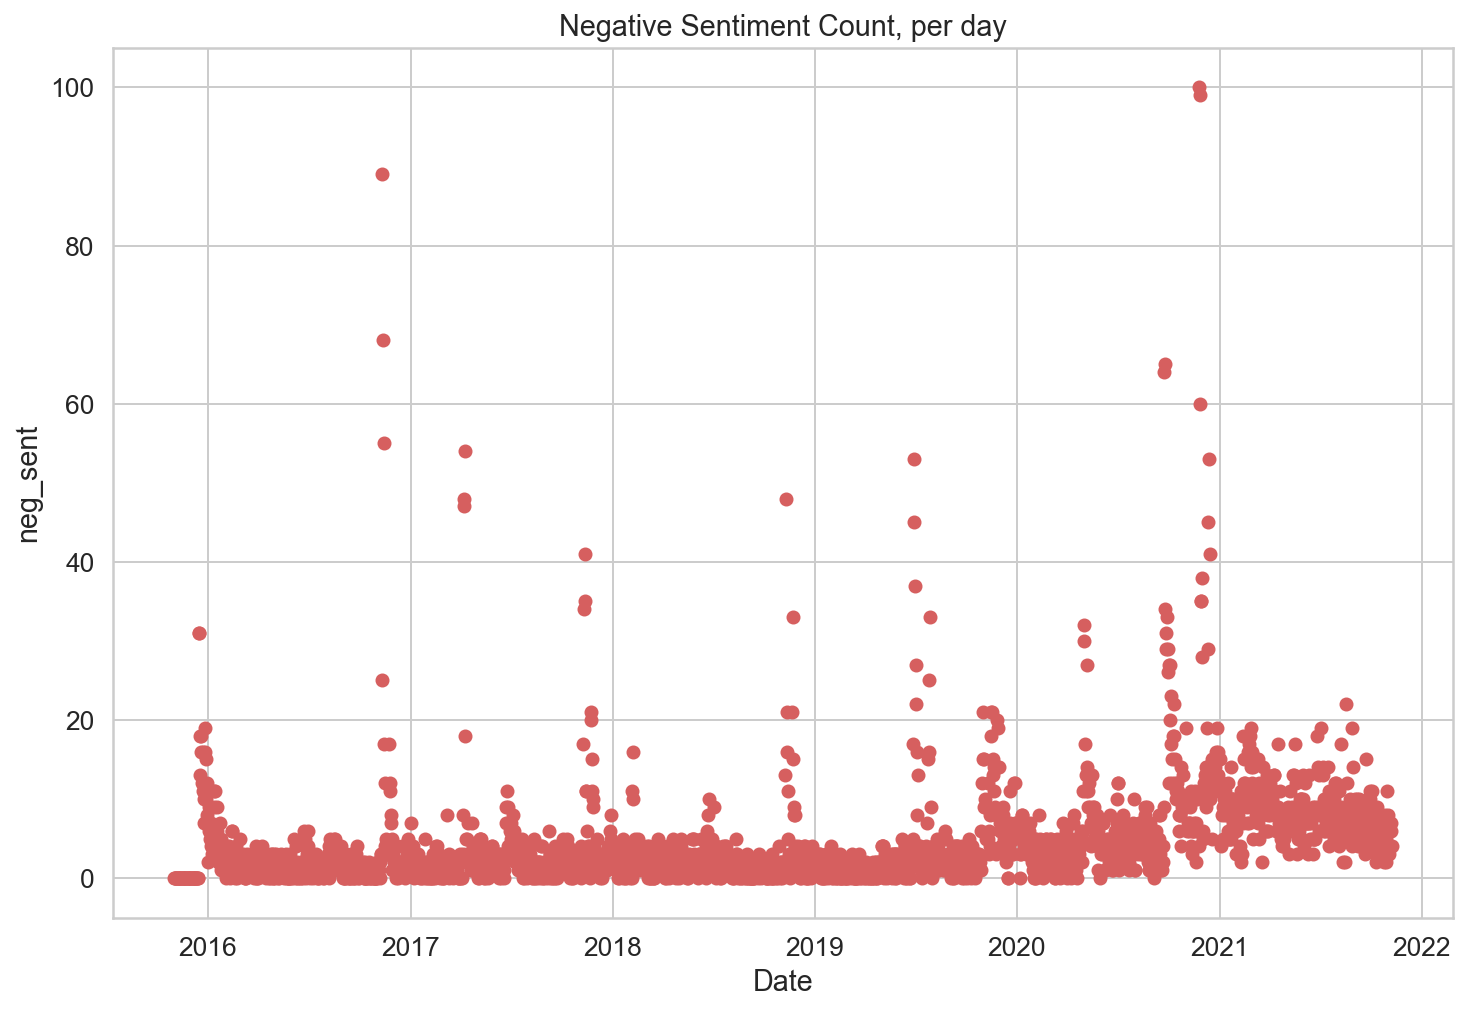

In [29]:
# inspect sentiment over time
plt.scatter(scatter_dates, scatter_neg_count, c='r')
plt.title('Negative Sentiment Count, per day')
plt.ylabel('neg_sent')
plt.xlabel('Date');

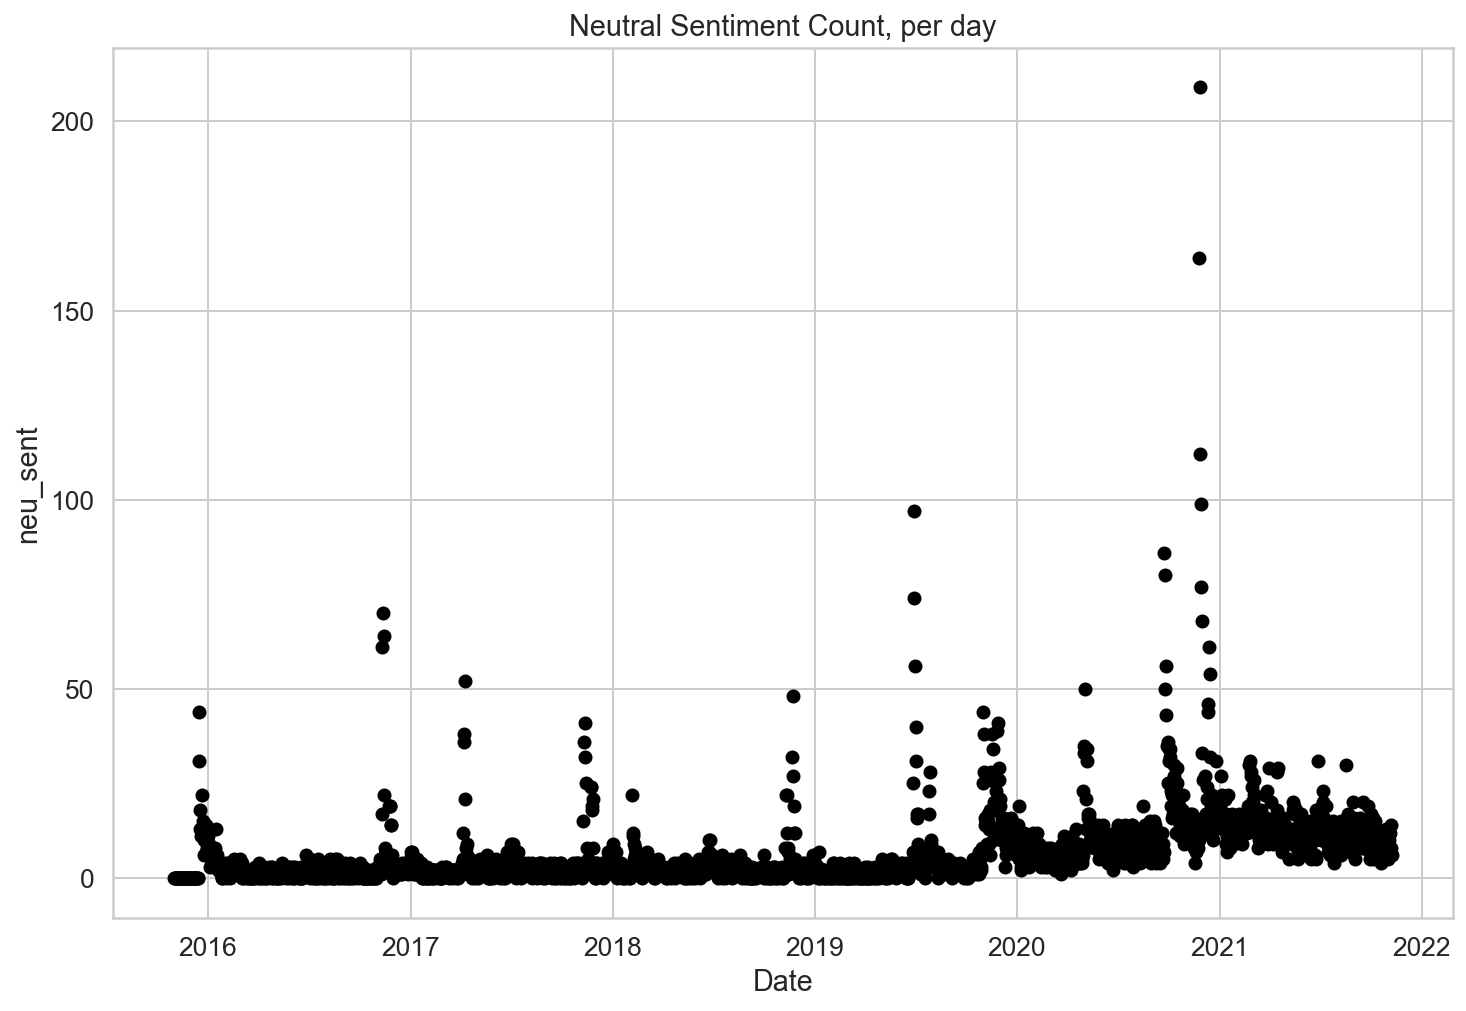

In [30]:
# inspect neutral sentiment over time
plt.scatter(scatter_dates, scatter_neu_count, c='black')
plt.title('Neutral Sentiment Count, per day')
plt.ylabel('neu_sent')
plt.xlabel('Date');

In [17]:
#In review of the sentiment counts and distributions, it would be interesting to see if some 
#of the 'spikes' were the result of the game going on sale. Steam does have regular sales, 
#such as 'summer sales' as well as sales around the holidays. I assume the spikes 
#were the direct result of these. It's also possible that these spikes were due to big 
#Twitch streamers playing the game, and their viewers buying it. Also, the increase observed 
#at the end of 2019 remained a mystery.

<a id='#3.3'></a>

## 3.3 Sentiment Distribution vs. Twitch Views

In [12]:
# make list of twitch views
#scatter_ttv_views = df_upd['Twitch_Viewers'].tolist()

In [14]:
# inspect sentiment over time
#plt.scatter(scatter_ttv_views, scatter_postdist)
#plt.title('Positive Sentiment Distribution vs. Twitch Views (same day reviews)')
#plt.ylabel('pos_dist')
#plt.xlabel('Twitch Views')
#plt.xlim(0,6000);

<a id='#4.'></a>

## 4. Closing Thoughts

        There were several major hurdles that I had to overcome in my journey that I wanted to quickly address. Sadly, I was not able to answer all the posted questions. The game developers did not share sales figures with me. As as result I was not able to predict sales trends as a function of previous game reviews. I could have used Twitch views as a soft marker of 'sales' but that would have been a stretch. Also, I couldn't explore multiple sentiments via a 3rd-party model: 
   [crystalfeel](http://www.crystalfeel.socialanalyticsplus.net/)
   
        They did not return my inquiries. Nevertheless, I hand-coded a portion of the game reviews by hand, with a ~51% accuracy of expending the lables to the rest of the game reviews. A notebook of that may be found here:
  [multiple sentiments via crystalfeel](https://github.com/cbroker1/text-as-data/blob/master/notebooks/TAD_Week_7_Broker_Carl.ipynb)
  
         GPU Training. Up till this point I did not have that much experience using my GPU for training. Learning how to use pytorch to set up tensors and pass them to my GPU was a challenge. Once I got it up and running however, I had a lot of fun exploring different training datasets and the power GPU training offered in developing larger models (we're talking days of training). My model's accuracy ended up being worse @100k training samples vs 10k, which was a valuable lesson learned:
  [training exploration](https://github.com/cbroker1/text-as-data/blob/master/notebooks/TAD_Week_5_Broker_Carl.ipynb)
  
         I did explore increasing my Epoch count to 100 (8 hours of training on my 10K training dataset) and did not find a significant increace in model performace. Hence why in my final draft I left it at 10 Epochs. 
  
         In the future, I'm interested in exploring longer lenghts of tokens (in turn, sentence length) when using BERT models. A significant portion of the game reviews are longer than what BERT allows. Also, using a rented cloud service for training as that took a significant portion of my time.
         
         Thank you for your time.